In [2]:
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import pytesseract
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, Flatten, Input, Dropout, LSTM, GlobalMaxPooling1D
from keras.models import Sequential
from keras.initializers import Constant
from keras.utils import to_categorical
import nltk
import seaborn as sns
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [130]:
def adaptive(img):
      
    plt.imshow(img)
    plt.show()
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.imshow(gray)
    plt.show()
    ret, thresh = cv2.threshold(gray, 28, 255, cv2.THRESH_BINARY)  #110
#     plt.imshow(thresh)
#     plt.show()

#     cv2.waitKey()

#     threshMean = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,2)
    plt.imshow(thresh)
    plt.show()

#     threshGauss = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 27)
#     plt.imshow(threshGauss)
#     plt.show()
    config = '-l eng'
   # img = Imm
    text= pytesseract.image_to_string(thresh, config=config)
    print("OUTPUT",text)
    validChars = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
                  'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

    cleanText = []

    for char in text:
        if char in validChars:
            cleanText.append(char)

#     plate = ''.join(cleanText)
#     print(plate)
#     cv2.imwrite("processed\\plate{}.jpg".format(i), threshGauss)
#     cv2.waitKey(0)

In [ ]:
def adaptiveThreshold(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    # cv2.imshow('gray', gray)

    ret, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
    plt.imshow(thresh)
    plt.show()
#     cv2.waitKey()

    threshMean = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,10)
    # cv2.imshow('threshMean', threshMean)

    threshGauss = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 27)
    # cv2.imshow('threshGauss', threshGauss)
#     plt.imshow(threshGauss)
#     plt.show()
    config = '-l eng'
    # img = Imm
    text = pytesseract.image_to_string(threshGauss, config=config)
    print("OUTPUT",text)
    validChars = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
                  'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

    cleanText = []

    for char in text:
        if char in validChars:
            cleanText.append(char)

    plate = ''.join(cleanText)
    # cv2.imwrite("processed\\plate{}.jpg".format(i), threshGauss)

    return plate

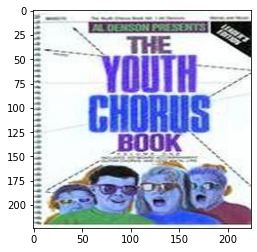

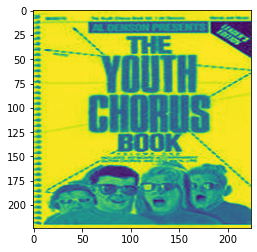

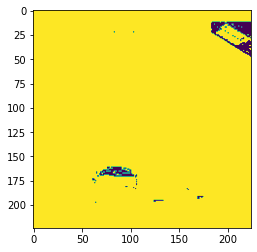

OUTPUT 


In [131]:
import cv2
frame = cv2.imread("/kaggle/input/book-data/224x224/0001484524.jpg")
plt.imshow(frame)
text= adaptive(frame)
# print(text)
# cv2.putText(frame, text, (50,50), cv2.FONT_HERSHEY_SIMPLEX,1, (0, 0,255),2,cv2.LINE_AA)
# plt.imshow(frame)

# cv2.imshow('frame', frame)
# # if  & 0xFF ==ord('q'):
# #     break
# cv2.waitKey(0)




# MODEL

Train Dataset has 51300 rows and 30 unique genres.

['Biographies & Memoirs', "Children's Books",
       'Engineering & Transportation', 'Christian Books & Bibles',
       'Sports & Outdoors', 'Health, Fitness & Dieting', 'Medical Books',
       'Science & Math', 'Travel', 'Business & Money',
       'Cookbooks, Food & Wine', 'Politics & Social Sciences',
       'Crafts, Hobbies & Home', 'Religion & Spirituality',
       'Literature & Fiction', 'Humor & Entertainment', 'Law',
       'Computers & Technology', 'Test Preparation', 'Arts & Photography',
       'Parenting & Relationships', 'Romance', 'History',
       'Comics & Graphic Novels', 'Reference', 'Teen & Young Adult',
       'Self-Help', 'Calendars', 'Science Fiction & Fantasy',
       'Mystery, Thriller & Suspense']




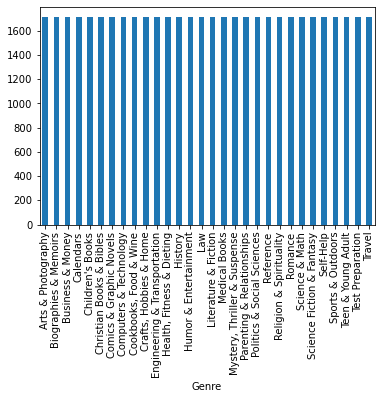

In [3]:
csv_file = pd.read_csv("/kaggle/input/book-csv/new.csv",header=None) 
csv_file
# csv_file
dataset = csv_file.iloc[:,[3,6,5]]
dataset.columns = ['Title','Genre','Label']
dataset

dataset.groupby('Genre').nunique()
dataset.groupby('Genre').Genre.count().plot.bar(ylim=0)
plt.show()
# dataset
# dataset['genre']

# genres=[]

# for i in dataset['genre']:
#     genres.append([i])

# dataset['genre']=genres
# dataset
# from sklearn.preprocessing import MultiLabelBinarizer
# mlb = MultiLabelBinarizer()
# mlb.fit_transform([dataset['genre'].values])
# # list(mlb.classes_)
# mlb.fit_transform([['sci-fi', 'thriller', 'comedy']])
# mlb.classes_


# # get all genre tags in a list
# all_genres = sum(genres,[])
# len(set(all_genres))

# all_genres = nltk.FreqDist(all_genres) 

# # create dataframe
# all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
#                               'Count': list(all_genres.values())})

# g = all_genres_df.nlargest(columns="Count", n = 50) 
# plt.figure(figsize=(12,15)) 
# ax = sns.barplot(data=g, x= "Count", y = "Genre") 
# ax.set(ylabel = 'Count') 
# plt.show()

In [ ]:
# # dataset['Label'] = dataset['Genre'].factorize()[0]
# # dataset

# from sklearn.preprocessing import MultiLabelBinarizer

# multilabel_binarizer = MultiLabelBinarizer()
# multilabel_binarizer.fit(dataset['genre'])

# # transform target variable
# y = multilabel_binarizer.transform(dataset['genre'])
# # multilabel_binarizer.classes_
dataset

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = '' 
stopwords = set(STOPWORDS)

# iterate through the csv file 
for val in dataset.Title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, max_words=1000,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

We have a Balanced Dataset

In [4]:
import re
import nltk
# Download Stopwords (like the, is, a, etc.)
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


# Clean & Pre-process the title
def clean_data(title):
 
    # Replace anything except letters by spaces--Removes punctuations
    title = re.sub(r'[^a-zA-Z]', ' ', title)
    # Convert the title to lower case
    title = title.lower()
    # Split the title into words
    title = title.split()
    # Get all the English language stopwords
    english_stopwords = stopwords.words('english')
    # Remove'not' from these stopwords as it is import to show a negative sentiment
    english_stopwords.remove('not')
    # Remove stop words & stemming
#     st = PorterStemmer()
    wordnet_lemmatizer = WordNetLemmatizer()

    title = [wordnet_lemmatizer.lemmatize(word) for word in title if not word in set(english_stopwords)]
    
    
    
    # Join the word back to form a sentence
    title = ' '.join(title)

    return title

# Clean the data-set
dataset['Title'] = dataset.Title.apply(lambda x: clean_data(x))


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
dataset

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = '' 
stopwords = set(STOPWORDS)

# iterate through the csv file 
for val in dataset.Title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, max_words=1000,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
c=0
max = 0
for i in dataset['Title']:
    c+=len(i.split())
    if len(i.split()) > max:
        max = len(i.split())
c,max

In [5]:
# Plot Accuracy & Loss Plots
def plot_acc_loss(model):
    # "Accuracy"
    plt.plot(model.history['acc'])
    plt.plot(model.history['val_acc'])
    plt.title('NLP Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
    plt.show()

    # "Loss"
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title(' NLP Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val'], loc='upper right')
    plt.show()

In [6]:
from keras import backend as K

def train_model(X_train, y_train, MAX_WORDS, maxlen):
    

    # Model Architecture
    model = Sequential()
    model.add(Embedding(MAX_WORDS, 300, input_length=maxlen))
#     model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
#     model.add(LSTM(256,return_sequences=True))
#     model.add(Dropout(0.2))
#     model.add(LSTM(128))
#     model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(30, activation='softmax'))
    
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
    K.set_value(model.optimizer.learning_rate, 0.001)
#     print(model.optimizer.learning_rate)
    print(model.summary())
    history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1,validation_split=0.2,shuffle=True)
    plot_acc_loss(history)

    return model, history.history['acc'][-1], history.history['loss'][-1]

MAX_WORDS = 16000
tokenizer = Tokenizer(num_words=MAX_WORDS,oov_token='<oov>')
tokenizer.fit_on_texts(dataset['Title'])
X_train = tokenizer.texts_to_sequences(dataset['Title'])
# Adding 1 [reserved 0 index for out of vocabulary words]
# vocab_size = min(num_words,len(tokenizer.word_index) + 1)
# print("VOCAB SIZE",vocab_size)
# Assigning a value to max_length
maxlen = 8
# # # # Training features & Labels
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
y_train = dataset['Label'].values
y_train = to_categorical(y_train)
# # # # print(y_train.shape)
# # # # Train the Reviews
model, accuracy, loss = train_model(X_train, y_train, MAX_WORDS, maxlen)
# # # num_words = len(tokenizer.word_index) + 1
# num_words

# len(tokenizer.word_index)
# X_train
# np.max(np.array([len(i) for i in X_train]))
# dataset.iloc[85452,0]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 300)            4800000   
_________________________________________________________________
lstm (LSTM)                  (None, 50)                70200     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
flatten (Flatten)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 30)                1530      
Total params: 4,871,730
Trainable params: 4,871,730
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
317/321 [============================>.] - ETA: 0s - loss: 2.6271 - acc: 0.2980

KeyboardInterrupt: 

# The first ONE!!!!

In [ ]:
def train_model(X_train, y_train, vocab_size, maxlen):

    # Model Architecture
    model = Sequential()
    model.add(Embedding(vocab_size, 24, input_length=maxlen))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
#     model.add(Flatten())
    model.add(Dense(30, activation='sigmoid'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    print(model.summary())
    history = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1,validation_split=0.1)
    plot_acc_loss(history)

    return model, history.history['acc'][-1], history.history['loss'][-1]

tokenizer = Tokenizer(num_words=None)
tokenizer.fit_on_texts(dataset['Title'])
X_train = tokenizer.texts_to_sequences(dataset['Title'])
# Adding 1 [reserved 0 index]
vocab_size = len(tokenizer.word_index) + 1
# Assigning a value to max_length
maxlen = 45
# Training features & Labels
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
y_train = dataset['Label'].values
y_train = to_categorical(y_train)
# print(y_train.shape)
# Train the Reviews
model, accuracy, loss = train_model(X_train, y_train, vocab_size, maxlen)

In [ ]:
comment_words

len(set(comment_words.split(' '))) - 1


# Glove Embedding 1

In [7]:
GLOVE_DIR = '/kaggle/input/glove6b'
print('Indexing word vectors.')

embeddings_index = {}
with open(os.path.join(GLOVE_DIR, 'glove.6B.300d.txt')) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs
        
print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


Found 29811 unique tokens.
Training model.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 300)           4950000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                70200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
Total params: 5,021,730
Trainable params: 71,730
Non-trainable params: 4,950,000
_________________________________________________________________
None
Epoch 1/10
361/361 [==============================] - 2s 

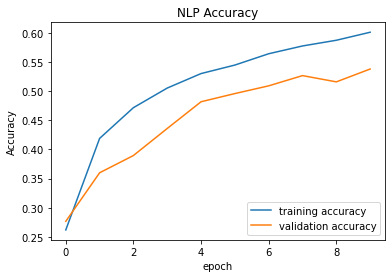

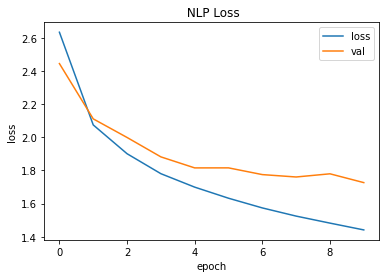

In [8]:
from keras.utils import to_categorical

# finally, vectorize the text samples into a 2D integer tensor
MAX_SEQUENCE_LENGTH = 20
EMBEDDING_DIM = 300
MAX_NUM_WORDS = 16500   #13500 with stem
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(dataset['Title'])
X_train = tokenizer.texts_to_sequences(dataset['Title'])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# print(word_index)


# Training features & Labels
X_train = pad_sequences(X_train, padding='post', maxlen=MAX_SEQUENCE_LENGTH)
y_train = dataset['Label'].values
y_train = to_categorical(y_train)

# prepare embedding matrix
num_words = min(MAX_NUM_WORDS,len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector



print('Training model.')
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')


# Model Architecture
model = Sequential()
model.add(Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(30, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1,validation_split=0.1,shuffle = True)
plot_acc_loss(history)

In [9]:
test= pd.read_csv('/kaggle/input/test-data/test_data.csv')
test_dataset = test.iloc[:,[3,6,5]]
test_dataset.columns = ['Title','Genre','Label']
# Clean the data-set
test_dataset['Title'] = test_dataset.Title.apply(lambda x: clean_data(x))
X_test= tokenizer.texts_to_sequences(test_dataset['Title'])
X_test = pad_sequences(X_test, padding='post', maxlen=MAX_SEQUENCE_LENGTH)
y_test = test_dataset['Label'].values
y_test = to_categorical(y_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
test_hist = model.evaluate(X_test,y_test)

179/179 [==============================] - 1s 3ms/step - loss: 1.8078 - acc: 0.5138


In [ ]:
# Plot Accuracy & Loss Plots
def plot_acc_loss(model):
    # "Accuracy"
    plt.plot(model.history['acc'])
    plt.plot(model.history['val_acc'])
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
    plt.show()

    # "Loss"
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title(' Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val'], loc='upper right')
    plt.show()

In [ ]:
plot_acc_loss(history)

[1.819826364517212, 0.49728021025657654] : Lemma 
[1.9910560846328735, 0.4556939899921417] :Lemma + 'a'

# GLOVE 2

In [ ]:
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from keras.models import Model


sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(2)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = MaxPooling1D(2)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = MaxPooling1D(2)(x)  # global max pooling
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(30, activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

history = model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1,validation_split=0.2,shuffle=True)
plot_acc_loss(history)




# Glove 3

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(64, 3, activation='relu')(embedded_sequences)
x = MaxPooling1D(2)(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
# x = Dense(32, activation='relu')(x)
preds = Dense(30, activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
print(model.summary())
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1,validation_split=0.2)
plot_acc_loss(history)




# Glove 4

In [ ]:
model = Sequential()
embedding_layer = Embedding(num_words, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH , trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(30, activation='sigmoid'))
print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1,validation_split=0.1)
plot_acc_loss(history)

# Glove 5

In [ ]:
model = Sequential()
embedding_layer = Embedding(num_words, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH , trainable=False)
model.add(embedding_layer)
model.add(Conv1D(50, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(30, activation='sigmoid'))
print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1,validation_split=0.1)
plot_acc_loss(history)

# Glove 6

In [ ]:
model = Sequential()
embedding_layer = Embedding(num_words, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH , trainable=False)
model.add(embedding_layer)
# model.add(LSTM(32,return_sequences=True))
# model.add(Dropout(0.5))
model.add(LSTM(32,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16))
model.add(Dropout(0.2))
# model.add(LSTM(16))
# model.add(Dropout(0.2))
model.add(Dense(30, activation='sigmoid'))
print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1,shuffle = True,validation_split = 0.2)
plot_acc_loss(history)

In [ ]:
test= pd.read_csv('/kaggle/input/test-data/test_data.csv')
test_dataset = test.iloc[:,[3,6,5]]
test_dataset.columns = ['Title','Genre','Label']
# Clean the data-set
test_dataset['Title'] = test_dataset.Title.apply(lambda x: clean_data(x))
X_test= tokenizer.texts_to_sequences(test_dataset['Title'])
X_test = pad_sequences(X_test, padding='post', maxlen=MAX_SEQUENCE_LENGTH)
y_test = test_dataset['Label'].values
y_test = to_categorical(y_test)

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
[1.846132516860962, 0.4958764612674713] : 3 32 layer LSTM batch 128
[1.851745367050171, 0.490261435508728] : 2 32 LSTM layer batch 128
[1.8444288969039917, 0.4978066384792328] : 2 32 lstm batch 64
    






    

# Glove 7

In [ ]:
model = Sequential()
embedding_layer = Embedding(num_words, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH , trainable=False)
model.add(embedding_layer)
# model.add(LSTM(32,return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(32,return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
# model.add(LSTM(16))
# model.add(Dropout(0.2))
model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(30, activation='sigmoid'))
print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1,shuffle = True,validation_split = 0.2)
plot_acc_loss(history)

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [ ]:
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [ ]:
df = dataset
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['Title'])

In [ ]:
t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_threads=-1)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

In [ ]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

In [ ]:
from gensim.models.phrases import Phrases, Phraser

In [ ]:
# from nltk import bigram
sent = [row.split() for row in df_clean['clean']]
# df_clean
phrases = Phrases(sent, min_count=30, progress_per=10000)
bigram = Phraser(phrases)
sentences = bigram[sent]
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)
sorted(word_freq, key=word_freq.get, reverse=True)[:10]


In [ ]:
import multiprocessing

from gensim.models import Word2Vec,Fasttext

In [ ]:
cores = multiprocessing.cpu_count()
cores

In [ ]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

In [ ]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

In [ ]:
w2v_model.init_sims(replace=True)

In [ ]:
w2v_model.wv.most_similar(positive=["guide"])

In [ ]:
filename='model.txt'
w2v_model.wv.save_word2vec_format(filename,binary = False)

In [ ]:
import os
embeddings_index={}
f = open(os.path.join('','model.txt'),encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()

# finally, vectorize the text samples into a 2D integer tensor
MAX_SEQUENCE_LENGTH = 10
EMBEDDING_DIM = 300
MAX_NUM_WORDS = 16000   #13500 with stem
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(dataset['Title'])
X_train = tokenizer.texts_to_sequences(dataset['Title'])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# print(word_index)


# Training features & Labels
X_train = pad_sequences(X_train, padding='post', maxlen=MAX_SEQUENCE_LENGTH)
y_train = dataset['Label'].values
y_train = to_categorical(y_train)

y_train.shape,X_train.shape

In [ ]:
num_words = len(word_index) + 1 
embedding_matrix = np.zeros((num_words,EMBEDDING_DIM))

for word, i in word_index.items():
    if i >num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

In [ ]:
num_words

In [ ]:
from keras.layers import GRU

model = Sequential()
embedding_layer = Embedding(num_words,EMBEDDING_DIM,embeddings_initializer = Constant(embedding_matrix),input_length = MAX_SEQUENCE_LENGTH,trainable = False)
model.add(embedding_layer)
model.add(GRU(128,dropout = 0.2,recurrent_dropout = 0.2))
model.add(Dense(30,activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1,shuffle = True,validation_split = 0.2)
plot_acc_loss(history)

In [ ]:
from keras.layers import GRU

model = Sequential()
embedding_layer = Embedding(num_words,EMBEDDING_DIM,embeddings_initializer = Constant(embedding_matrix),input_length = MAX_SEQUENCE_LENGTH,trainable = False)
model.add(embedding_layer)
model.add(GRU(64,dropout = 0.2,recurrent_dropout = 0.2))
model.add(Dense(30,activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1,shuffle = True,validation_split = 0.2)
plot_acc_loss(history)

In [ ]:
# Model Architecture
model = Sequential()
embedding_layer = Embedding(num_words,EMBEDDING_DIM,embeddings_initializer = Constant(embedding_matrix),input_length = MAX_SEQUENCE_LENGTH,trainable = False)

model.add(embedding_layer)
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.2))
# model.add(LSTM(16))
# model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(30, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())
history = model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1,validation_split=0.1,shuffle = True)
plot_acc_loss(history)

# Testing

In [ ]:
test= pd.read_csv('/kaggle/input/test-data/test_data.csv')
test_dataset = test.iloc[:,[3,6,5]]
test_dataset.columns = ['Title','Genre','Label']
# Clean the data-set
test_dataset['Title'] = test_dataset.Title.apply(lambda x: clean_data(x))
X_test= tokenizer.texts_to_sequences(test_dataset['Title'])
X_test = pad_sequences(X_test, padding='post', maxlen=MAX_SEQUENCE_LENGTH)
y_test = test_dataset['Label'].values
y_test = to_categorical(y_test)
model.evaluate(X_test,y_test)